In [54]:
tend = time.time()
print(tend-t)

28.6209237575531


0.3333333333333333
[0.04752019 0.05520954 0.06820454 0.03006536]
54.717822790145874


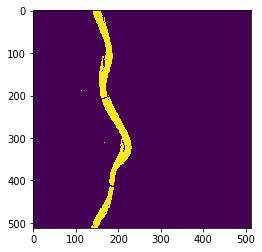

In [8]:

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import time
import random
t = time.time()
img1=plt.imread('/home/jitu/pyprojects/band1(R).png')
img2=plt.imread('/home/jitu/pyprojects/band2(G).png')
img3=plt.imread('/home/jitu/pyprojects/band3(B).png')
img4=plt.imread('/home/jitu/pyprojects/band4(I).png')
actual = plt.imread('/home/jitu/pyprojects/ground_truth.png')
non_riv = np.loadtxt('/home/jitu/pyprojects/non_river.txt')
riv = np.loadtxt('/home/jitu/pyprojects/river.txt')

len1 = len(riv)
len2  = len(non_riv)
len3 = len1 + len2
prior_riv = len1/len3
prior_non_riv = len2/len3
print(prior_riv)

result_riv = np.array(np.zeros(len1*4).reshape(len1,4))

for i in range(len1):
    result_riv[i] = [img1[int(riv[i,0]),int(riv[i,1])],img2[int(riv[i,0]),int(riv[i,1])],img3[int(riv[i,0]),int(riv[i,1])],img4[int(riv[i,0]),int(riv[i,1])]]
    
result_nonriv = np.array(np.zeros(len2*4).reshape(len2,4))

for i in range(len2):
    result_nonriv[i] = [img1[int(non_riv[i,0]),int(non_riv[i,1])],img2[int(non_riv[i,0]),int(non_riv[i,1])],img3[int(non_riv[i,0]),int(non_riv[i,1])],img4[int(non_riv[i,0]),int(non_riv[i,1])]]    

    
riv_mu = np.mean(result_riv,axis = 0)
nonriv_mu = np.mean(result_nonriv,axis = 0)
riv_cov = np.cov(result_riv,rowvar=False)
nonriv_cov = np.cov(result_nonriv,rowvar=False)
print(riv_mu)
final = np.array(np.zeros(512**2).reshape(512,512))

lik_riv = sp.multivariate_normal(riv_mu,riv_cov)
lik_nonriv = sp.multivariate_normal(nonriv_mu,nonriv_cov)
for i in range (512):
    for j in range(512):
        postprob_riv = lik_riv.pdf([img1[i,j],img2[i,j],img3[i,j],img4[i,j]]) * prior_riv
        postprob_nonriv = lik_nonriv.pdf([img1[i,j],img2[i,j],img3[i,j],img4[i,j]])*prior_non_riv
        if(postprob_riv >postprob_nonriv):
            final[i,j] = 1
plt.imshow(final)
tend = time.time()
print(tend-t)


0.3333333333333333
[0.04752019 0.05520954 0.06820454 0.03006536]
time  53.725197315216064


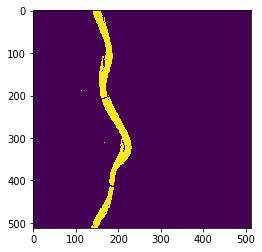

In [36]:

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import time
import random
t = time.time()
img1=plt.imread('/home/jitu/pyprojects/band1(R).png')
img2=plt.imread('/home/jitu/pyprojects/band2(G).png')
img3=plt.imread('/home/jitu/pyprojects/band3(B).png')
img4=plt.imread('/home/jitu/pyprojects/band4(I).png')
actual = plt.imread('/home/jitu/pyprojects/ground_truth.png')
non_riv = np.loadtxt('/home/jitu/pyprojects/non_river.txt')
riv = np.loadtxt('/home/jitu/pyprojects/river.txt')

len1 = len(riv)
len2  = len(non_riv)
len3 = len1 + len2
prior_riv = len1/len3
prior_non_riv = len2/len3
print(prior_riv)

result_riv = np.array(np.zeros(len1*4).reshape(len1,4))

for i in range(len1):
    result_riv[i] = [img1[int(riv[i,0]),int(riv[i,1])],img2[int(riv[i,0]),int(riv[i,1])],img3[int(riv[i,0]),int(riv[i,1])],img4[int(riv[i,0]),int(riv[i,1])]]
    
result_nonriv = np.array(np.zeros(len2*4).reshape(len2,4))

for i in range(len2):
    result_nonriv[i] = [img1[int(non_riv[i,0]),int(non_riv[i,1])],img2[int(non_riv[i,0]),int(non_riv[i,1])],img3[int(non_riv[i,0]),int(non_riv[i,1])],img4[int(non_riv[i,0]),int(non_riv[i,1])]]    

    
riv_mu = np.mean(result_riv,axis = 0)
nonriv_mu = np.mean(result_nonriv,axis = 0)
riv_cov = np.cov(result_riv,rowvar=False)
nonriv_cov = np.cov(result_nonriv,rowvar=False)
print(riv_mu)
final = np.array(np.zeros(512**2).reshape(512,512))

lik_riv = sp.multivariate_normal(riv_mu,riv_cov)
lik_nonriv = sp.multivariate_normal(nonriv_mu,nonriv_cov)

for i in range (512):
    for j in range(512):
        postprob_riv = lik_riv.pdf([img1[i,j],img2[i,j],img3[i,j],img4[i,j]]) * prior_riv
        postprob_nonriv = lik_nonriv.pdf([img1[i,j],img2[i,j],img3[i,j],img4[i,j]])*prior_non_riv
        if(postprob_riv >postprob_nonriv):
            final[i,j] = 1
tend = time.time()
print("time ",tend-t)
plt.imshow(final)


In [39]:

actual = actual.flatten() #    ground truth value in one row
final = final.flatten()         #    predicted final value in one row
A= sum([1 for x,y in zip(actual,final) if x==y])
print("Accuracy", A/(512*512))


Accuracy 0.9979400634765625
